<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/slicing/augmentation_of_tumour_images_(for_sliced_into_64_parts)z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import nibabel as nib
import random
import glob
from matplotlib.gridspec import GridSpec
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Required datapaths
DATASET_PATH = r"/content/drive/MyDrive/PKG - UPENN-GBM NIfTI files/NIfTI-files/images_structural" +'/'
MASK_PATH = r"/content/drive/MyDrive/PKG - UPENN-GBM NIfTI files/NIfTI-files/automated_segm"+'/'

In [ ]:
test_image_flair2=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_FLAIR.nii').get_fdata()
test_image_t12=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii').get_fdata()
test_image_t1GD2=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1GD.nii').get_fdata()
test_image_t22=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T2.nii').get_fdata()
test_mask=nib.load(MASK_PATH + 'UPENN-GBM-00002_11_automated_approx_segm.nii').get_fdata()

Text(0.5, 1.0, 'Mask')

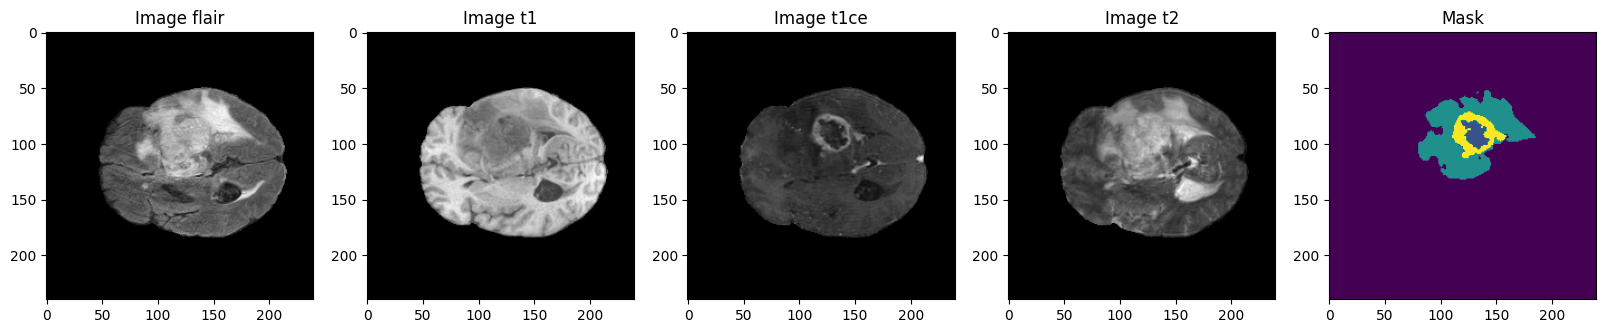

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 50
ax1.imshow(test_image_flair2[:,:,test_image_flair2.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t12[:,:,test_image_t12.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1GD2[:,:,test_image_t1GD2.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t22[:,:,test_image_t22.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

In [ ]:
np.min(test_mask), np.max(test_mask), test_mask.shape, type(test_mask)

(0.0, 4.0, (240, 240, 155), numpy.memmap)

In [ ]:
np.min(test_image_t12), np.max(test_image_t12), test_image_t12.shape, type(test_image_t12)

(0.0, 630.0, (240, 240, 155), numpy.memmap)

In [ ]:
test_mask[test_mask>0] = 1

In [ ]:
np.min(test_mask), np.max(test_mask), test_mask.shape, type(test_mask)

(0.0, 1.0, (240, 240, 155), numpy.memmap)

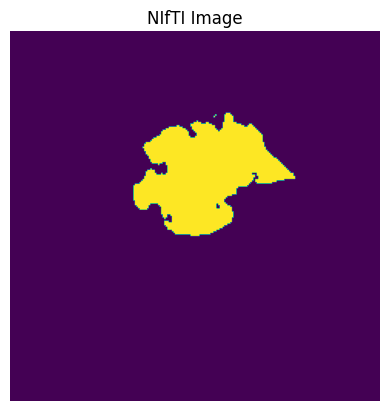

In [ ]:
plt.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
plt.title('NIfTI Image')
plt.axis('off')
plt.show()

In [ ]:
result = test_image_t12 * test_mask


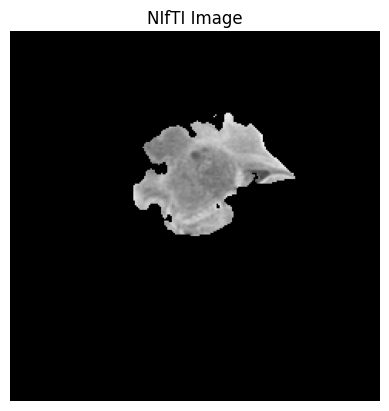

In [ ]:
slice_w = 50
plt.imshow(result[:,:,result.shape[0]//2-slice_w], cmap = 'gray')
plt.title('NIfTI Image')
plt.axis('off')
plt.show()

In [ ]:
image=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii')

In [ ]:
SLICE_DECIMATE_IDENTIFIER = 3
SLICE_X = False
SLICE_Y = False
SLICE_Z = True

In [ ]:
imageSliceOutput = r"/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_img"

In [ ]:
def saveSlice(nii_img, img_data, fname, path):
    slice_nii_img = nib.Nifti1Image(img_data, nii_img.affine)
    fout = os.path.join(path, f'{fname}.nii')
    nib.save(slice_nii_img,fout)
    print(f'[+] Slice saved: {fout}', end='\r')

saveSlice(image,result[:,:,79], 'test', imageSliceOutput)

Text(0.5, 1.0, 'Image')

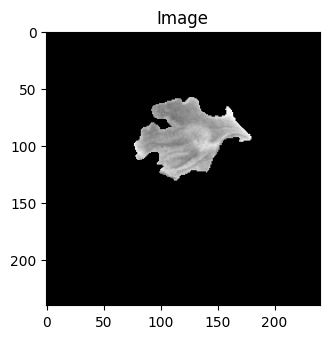

In [ ]:
data = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_img/test.nii').get_fdata()
plt.figure(figsize=(12, 4))
plt.subplot(131)  # 1 row, 3 columns, subplot 3
plt.imshow(data, cmap="gray")
plt.title("Image")

In [ ]:
# Slice image in all directions and save
def sliceAndSaveVolumeImage(nii_img, vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSlice(nii_img, vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)

    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSlice(nii_img, vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)

    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(nii_img, vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [ ]:
# Read and process image volumes
filename = 'UPENN-GBM-tumor'
print(filename, image.shape, np.sum(result.shape), np.min(result), np.max(result))
numOfSlices = sliceAndSaveVolumeImage(image, result, filename, imageSliceOutput)
print(f'\n{filename}, {numOfSlices} slices created \n')

UPENN-GBM-tumor (240, 240, 155) 635 0.0 526.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_img/UPENN-GBM-tumor-slice154_z.nii
UPENN-GBM-tumor, 155 slices created 



Text(0.5, 1.0, 'Image')

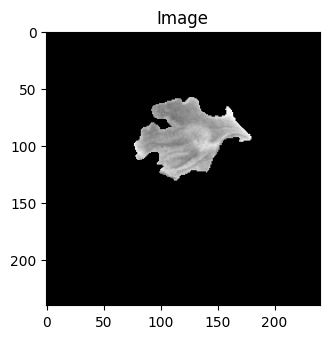

In [ ]:
data2 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_img/UPENN-GBM-tumor-slice079_z.nii').get_fdata()
plt.figure(figsize=(12, 4))
plt.subplot(131)  # 1 row, 3 columns, subplot 3
plt.imshow(data2, cmap="gray")
plt.title("Image")

**Now slicing each 2D images into 64 parts **

In [ ]:
Data_path= imageSliceOutput

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(Data_path)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
len(train_data_ids)

156

In [ ]:
train_data_ids[154]

'/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_img/UPENN-GBM-tumor-slice154_z.nii'

In [ ]:
train_img_ids =[]
for i in range(0,len(training_data_ids)-1):
  brain_img_ids = training_data_ids[i].split('UPENN-GBM-tumor-slice')[1]
  train_img_ids.append(brain_img_ids)

In [ ]:
final_ids = []
for i in range(len(train_img_ids)):
  path = os.path.join(Data_path, f'UPENN-GBM-tumor-slice{train_img_ids[i]}')
  img = nib.load(path).get_fdata()
  if img.max() > img.min():
    final_ids.append(train_img_ids[i].split('.nii')[0])

In [ ]:
len(final_ids)

81

In [ ]:
def normalized_imgfunc(img_data):
  data = ((img_data - img_data.min()) / (img_data.max() - img_data.min()))
  return data


In [ ]:
final_ids[49]

'079_z'

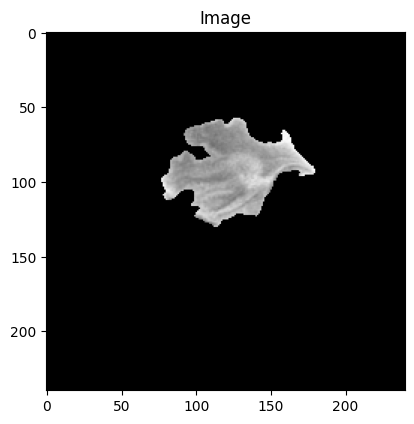

In [ ]:
path = os.path.join(Data_path, f'UPENN-GBM-tumor-slice{final_ids[49]}.nii')
img = nib.load(path)
img_data = img.get_fdata()
normalized_img = normalized_imgfunc(img_data)

plt.figure(figsize=(12, 4))

# Plot the first 2D NIfTI image
plt.subplot(131)  # 1 row, 3 columns, subplot 1
plt.imshow(normalized_img, cmap="gray")
plt.title("Image")


plt.tight_layout()
plt.show()

In [ ]:
x_dim, y_dim = normalized_img.shape

# Split the image into 6 equal parts (2x3 grid)
x_split = x_dim // 8
y_split = y_dim // 8

subimages = []
c = 1
for i in range(8):
    for j in range(8):
        x_start, x_end = i * x_split, (i + 1) * x_split
        y_start, y_end = j * y_split, (j + 1) * y_split

        subimage = normalized_img[x_start:x_end, y_start:y_end]
        subimages.append([c,subimage])
        c = c+1

In [ ]:
subimages[1][0]

2

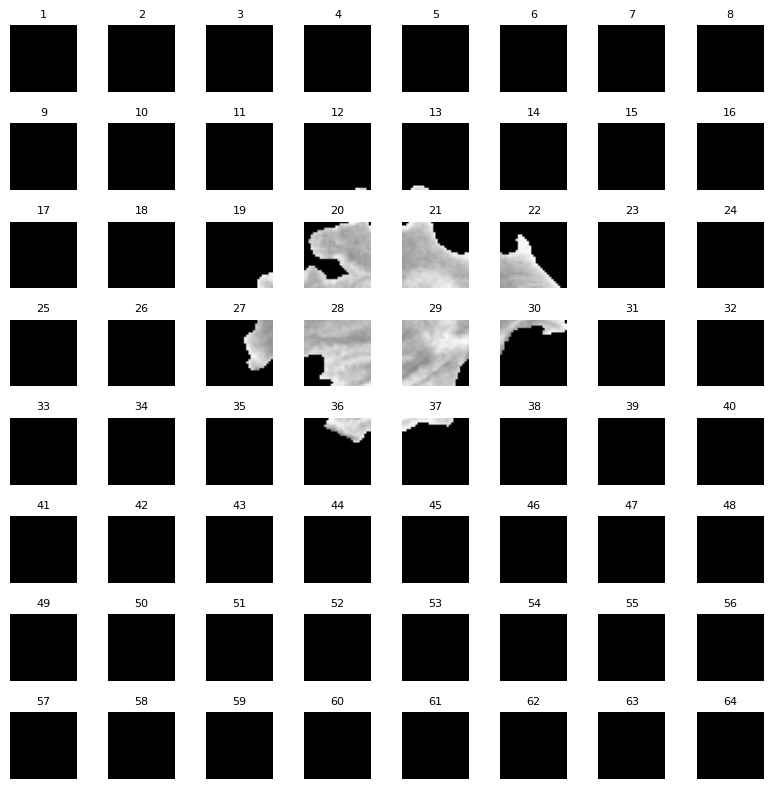

In [ ]:
# Create a figure and a grid of subplots (8x8)
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(8, 8, figure=fig)

# Loop through and display each image
for i in range(min(64, len(subimages))):
    img_data = subimages[i][1]
    ax = fig.add_subplot(gs[i])
    ax.imshow(img_data, cmap="gray")
    ax.set_title(subimages[i][0], fontsize=8)
    ax.axis("off")

plt.tight_layout()  # Ensure proper layout
plt.show()  # Display the grid of images


In [ ]:
subimages[3][1].shape

(30, 30)

In [ ]:
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [ ]:
output_path = r"/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part"

In [ ]:
for i in range(len(final_ids)):
    path = os.path.join(Data_path, f'UPENN-GBM-tumor-slice{final_ids[i]}.nii')
    img = nib.load(path).get_fdata()
    normalized_img = normalized_imgfunc(img)
    x_dim, y_dim = normalized_img.shape
    x_split = x_dim // 8
    y_split = y_dim // 8

    c = 1
    for k in range(8):
        for j in range(8):
            x_start, x_end = k * x_split, (k + 1) * x_split
            y_start, y_end = j * y_split, (j + 1) * y_split

            subimage = normalized_img[x_start:x_end, y_start:y_end]
            ids = os.path.join(f'{final_ids[i]}_{c}')
            saveSlice(subimage, ids, output_path)
            c = c + 1
    print(f'\n{final_ids[i]}, {c} slices created \n')


[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/030_z_64.png
030_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/031_z_64.png
031_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/032_z_64.png
032_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/033_z_64.png
033_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/034_z_64.png
034_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/035_z_64.png
035_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/tumor_image_64_part/036_z_64.png
036_z, 65 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 